# Tree Ensembles and Random Forests - Lab

## Introduction

In this lab, we'll create some popular tree ensemble models such as a bag of trees and random forest to predict a person's salary based on information about them. 

## Objectives

In this lab you will: 

- Train a random forest model using `scikit-learn`  
- Access, visualize, and interpret feature importances from an ensemble model 

## Import data

In this lab, you'll use personal attributes to predict whether people make more than 50k/year.  The dataset was extracted from the census bureau database. The goal is to use this dataset to try and draw conclusions regarding what drives salaries. More specifically, the target variable is categorical (> 50k and <= 50 k). Let's create a classification tree!

To get started, run the cell below to import everything we'll need for this lab. 

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import seaborn as sns
from scipy.stats import norm

Our dataset is stored in the file `'salaries_final.csv'`.  

In the cell below, import the dataset from this file and store it in a DataFrame. Be sure to set the `index_col` parameter to `0`.  Then, display the `.head()` of the DataFrame to ensure that everything loaded correctly.

In [2]:
# Import the data

nba = pd.read_excel('C:\\Users\\tmcro\\OneDrive\\0_NBA_Statistitcs_2021\\NBA Current Studies\\Data\\GameByGame_2021_Merged_Cleaned.xlsx')

In total, there are 6 predictors, and one outcome variable, the salary, `Target` - `<= 50k` and `>50k`.

The 6 predictors are:

- `Age`: continuous 

- `Education`: Categorical. Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool 

- `Occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces 

- `Relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried 

- `Race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black 

- `Sex`: Female, Male 

First, we'll need to store our `'Target'` column in a separate variable and drop it from the dataset.  

Do this in the cell below. 

In [3]:
#Identify columns with missing values
missing = nba.isna().sum()
missing_df = pd.DataFrame(missing)
missing_df = missing_df.loc[missing_df[0] > 0]
missing_df

,0
OT1,2024
OT2,2123
OT3,2135
OT4,2135
OT5,2135
MAIN REF,1068


In [4]:
nba.head()

,Unnamed: 0,Unnamed: 0.1,IndexNum,Team,Match Up,Game Date,tm_date,Team1_W_L,OffRtg,DefRtg,...,MAIN REF,CREW,OPENING ODDS,OPENING SPREAD,OPENING TOTAL,CLOSING\nODDS,CLOSING SPREAD,CLOSING TOTAL,MONEYLINE,HALFTIME
0,0,0,2160,SAS,SAS vs. PHX,5/16/2021,SAS_5162021,L,117.5,118.3,...,NaN,Curtis Blair,225.5u -09,11.0,225.5,221.5u -09,2.0,221.5,108,112u -15
1,1,1,2159,SAC,SAC vs. UTA,5/16/2021,SAC_5162021,L,97.1,119.8,...,NaN,Tre Maddox,227u -12,10.5,227.0,222u -13,11.5,222.0,529,113o -15
2,2,2,2158,CHA,CHA @ WAS,5/16/2021,CHA_5162021,L,105.8,112.7,...,JB DeRosa,David Guthrie,229.5o -12,5.0,229.5,228o -13,6.5,228.0,221,113.5u -15
3,3,3,2157,CHI,CHI vs. MIL,5/16/2021,CHI_5162021,W,113.5,107.7,...,NaN,Matt Boland,224.5u -10,3.5,224.5,224.5u -10,7.0,224.5,223,-1 -05
4,4,4,2156,IND,IND @ TOR,5/16/2021,IND_5162021,W,117.9,107.6,...,Ken Mauer,Evan Scott,-6 -10,-6.0,229.5,-6.5 -10,-6.5,227.0,-248,110.5o -15


In the cell below, examine the data type of each column:  

In [5]:
list(nba.columns)

['Unnamed: 0',
 'Unnamed: 0.1',
 'IndexNum',
 'Team',
 'Match\xa0Up',
 'Game\xa0Date',
 'tm_date',
 'Team1_W_L',
 'OffRtg',
 'DefRtg',
 'NetRtg',
 'AST%',
 'AST/TO',
 'Ast_ratio',
 'OREB%',
 'DREB%',
 'REB%',
 'TOV%',
 'eFG%',
 'TS%',
 'PACE_x',
 'PIE',
 'Team_2',
 'Team2_W_L',
 'Team2_OffRtg',
 'Team2_DefRtg',
 'Team2_NetRtg',
 'Team2_AST%',
 'Team2_AST/TO',
 'Team2_Ast_ratio',
 'Team2_OREB%',
 'Team2_DREB%',
 'Team2_REB%',
 'Team2_TOV%',
 'Team2_eFG%',
 'Team2_TS%',
 'Team2_PACE',
 'Team2_PIE',
 'Seas_Tm1_OffRtg',
 'Seas_Tm1_DefRtg',
 'Seas_Tm1_NetRtg',
 'Seas_Tm1_AST%',
 'Seas_Tm1_AST/TO',
 'Seas_Tm1_Ast_ratio',
 'Seas_Tm1_OREB%',
 'Seas_Tm1_DREB%',
 'Seas_Tm1_REB%',
 'Seas_Tm1_TOV%',
 'Seas_Tm1_eFG%',
 'Seas_Tm1_TS%',
 'Seas_Tm1_PACE',
 'Seas_Tm1_PIE',
 'Seas_Tm2_OffRtg',
 'Seas_Tm2_DefRtg',
 'Seas_Tm2_NetRtg',
 'Seas_Tm2_AST%',
 'Seas_Tm2_AST/TO',
 'Seas_Tm2_Ast_ratio',
 'Seas_Tm2_OREB%',
 'Seas_Tm2_DREB%',
 'Seas_Tm2_REB%',
 'Seas_Tm2_TOV%',
 'Seas_Tm2_eFG%',
 'Seas_Tm2_TS%',
 'S

In [6]:
nba = nba.drop(columns = [
       'OffRtg', 'DefRtg', 'NetRtg', 'AST%', 'AST/TO', 'Ast_ratio', 'OREB%',
       'DREB%', 'REB%', 'TOV%', 'eFG%', 'TS%', 'PACE_x', 'PIE', 'Team_2',
       'Team2_W_L', 'Team2_OffRtg', 'Team2_DefRtg', 'Team2_NetRtg',
       'Team2_AST%', 'Team2_AST/TO', 'Team2_Ast_ratio', 'Team2_OREB%',
       'Team2_DREB%', 'Team2_REB%', 'Team2_TOV%', 'Team2_eFG%', 'Team2_TS%',
       'Team2_PACE', 'Team2_PIE', 'Tot_Pts_Scored', 'Team1_pts', 'Team2_pts',
       'T1_Starter1', 'T1_Starter2', 'T1_Starter3', 'T1_Starter4',
       'T1_Starter5', 'T2_Starter1', 'T2_Starter2', 'T2_Starter3',
       'T2_Starter4', 'T2_Starter5', 'Ts_Game_ID',
       'T1_win', 'T2_win', 'games_left', 'Playoff_or_Homect_push', 'Home_team',
       'Old_algo_team1_pts', 'Tm1_gm_number', 'Tm1_Season_Wins',
       'Tm1_conference', 'Tm1_Season_Losses','IndexNum', 'Team',
       'Tm1_current_win%', 'Unnamed: 0',
       'Unnamed: 0.1', 'Match\xa0Up','Game\xa0Date'])

In [7]:
nba.columns

Index(['tm_date', 'Team1_W_L', 'Seas_Tm1_OffRtg', 'Seas_Tm1_DefRtg',
       'Seas_Tm1_NetRtg', 'Seas_Tm1_AST%', 'Seas_Tm1_AST/TO',
       'Seas_Tm1_Ast_ratio', 'Seas_Tm1_OREB%', 'Seas_Tm1_DREB%',
       'Seas_Tm1_REB%', 'Seas_Tm1_TOV%', 'Seas_Tm1_eFG%', 'Seas_Tm1_TS%',
       'Seas_Tm1_PACE', 'Seas_Tm1_PIE', 'Seas_Tm2_OffRtg', 'Seas_Tm2_DefRtg',
       'Seas_Tm2_NetRtg', 'Seas_Tm2_AST%', 'Seas_Tm2_AST/TO',
       'Seas_Tm2_Ast_ratio', 'Seas_Tm2_OREB%', 'Seas_Tm2_DREB%',
       'Seas_Tm2_REB%', 'Seas_Tm2_TOV%', 'Seas_Tm2_eFG%', 'Seas_Tm2_TS%',
       'Seas_Tm2_PACE', 'Seas_Tm2_PIE', 'BIGDATABALL\nDATASET', 'GAME-ID',
       'DATE', 'TEAM', 'Team_initials', 'VENUE', '1Q', '2Q', '3Q', '4Q', 'OT1',
       'OT2', 'OT3', 'OT4', 'OT5', 'F', 'MIN_y', 'FG', 'FGA', '3P', '3PA',
       'FT', 'FTA', 'OR', 'DR', 'TOT', 'A', 'PF', 'ST', 'TO', 'TO\nTO', 'BL',
       'PTS', 'POSS', 'PACE_y', 'OEFF', 'DEFF', 'TEAM\nREST DAYS', 'MAIN REF',
       'CREW', 'OPENING ODDS', 'OPENING SPREAD', 'OPENING TOTAL'

In [8]:
to_drop = ['1Q', '2Q', '3Q', '4Q', 'OT1',
       'OT2', 'OT3', 'OT4', 'OT5', 'F', 'MIN_y', 'FG', 'FGA', '3P', '3PA',
       'FT', 'FTA', 'OR', 'DR', 'TOT', 'A', 'PF', 'ST', 'TO', 'TO\nTO', 'BL',
       'PTS', 'POSS', 'PACE_y', 'OEFF', 'DEFF']

nba = nba.drop(columns = to_drop)

In [9]:
nba = nba.drop(columns = ['BIGDATABALL\nDATASET', 'GAME-ID',
       'DATE', 'TEAM','VENUE'])

In [10]:
nba.columns

Index(['tm_date', 'Team1_W_L', 'Seas_Tm1_OffRtg', 'Seas_Tm1_DefRtg',
       'Seas_Tm1_NetRtg', 'Seas_Tm1_AST%', 'Seas_Tm1_AST/TO',
       'Seas_Tm1_Ast_ratio', 'Seas_Tm1_OREB%', 'Seas_Tm1_DREB%',
       'Seas_Tm1_REB%', 'Seas_Tm1_TOV%', 'Seas_Tm1_eFG%', 'Seas_Tm1_TS%',
       'Seas_Tm1_PACE', 'Seas_Tm1_PIE', 'Seas_Tm2_OffRtg', 'Seas_Tm2_DefRtg',
       'Seas_Tm2_NetRtg', 'Seas_Tm2_AST%', 'Seas_Tm2_AST/TO',
       'Seas_Tm2_Ast_ratio', 'Seas_Tm2_OREB%', 'Seas_Tm2_DREB%',
       'Seas_Tm2_REB%', 'Seas_Tm2_TOV%', 'Seas_Tm2_eFG%', 'Seas_Tm2_TS%',
       'Seas_Tm2_PACE', 'Seas_Tm2_PIE', 'Team_initials', 'TEAM\nREST DAYS',
       'MAIN REF', 'CREW', 'OPENING ODDS', 'OPENING SPREAD', 'OPENING TOTAL',
       'CLOSING\nODDS', 'CLOSING SPREAD', 'CLOSING TOTAL', 'MONEYLINE',
       'HALFTIME'],
      dtype='object')

In [11]:
dropthese = ['Team_initials',
       'MAIN REF', 'CREW', 'OPENING ODDS', 'CLOSING\nODDS',
       'MONEYLINE',
       'HALFTIME', 'tm_date', 'OPENING SPREAD', 'CLOSING SPREAD']
nba = nba.drop(columns = dropthese)

In [12]:
nba.dtypes

Team1_W_L              object
Seas_Tm1_OffRtg       float64
Seas_Tm1_DefRtg       float64
Seas_Tm1_NetRtg       float64
Seas_Tm1_AST%         float64
Seas_Tm1_AST/TO       float64
Seas_Tm1_Ast_ratio    float64
Seas_Tm1_OREB%        float64
Seas_Tm1_DREB%        float64
Seas_Tm1_REB%         float64
Seas_Tm1_TOV%         float64
Seas_Tm1_eFG%         float64
Seas_Tm1_TS%          float64
Seas_Tm1_PACE         float64
Seas_Tm1_PIE          float64
Seas_Tm2_OffRtg       float64
Seas_Tm2_DefRtg       float64
Seas_Tm2_NetRtg       float64
Seas_Tm2_AST%         float64
Seas_Tm2_AST/TO       float64
Seas_Tm2_Ast_ratio    float64
Seas_Tm2_OREB%        float64
Seas_Tm2_DREB%        float64
Seas_Tm2_REB%         float64
Seas_Tm2_TOV%         float64
Seas_Tm2_eFG%         float64
Seas_Tm2_TS%          float64
Seas_Tm2_PACE         float64
Seas_Tm2_PIE          float64
TEAM\nREST DAYS        object
OPENING TOTAL         float64
CLOSING TOTAL         float64
dtype: object

In [13]:
#onedrive = 'C:\\Users\\tmcro\\OneDrive'
#nba = '\\0_NBA_Statistitcs_2021\\NBA Current Studies\\Data\\'
#flatiron = "\\Flatiron Data Science\\"
#filename = 'NBA_Data_ReadyRun'
#path = onedrive + nba + filename + '.xlsx'
#path

In [14]:
# Split the outcome and predictor variables
target = nba['Team1_W_L']
nba = nba.drop('Team1_W_L', axis=1)

In [15]:
df = nba

In [16]:
df.dtypes

Seas_Tm1_OffRtg       float64
Seas_Tm1_DefRtg       float64
Seas_Tm1_NetRtg       float64
Seas_Tm1_AST%         float64
Seas_Tm1_AST/TO       float64
Seas_Tm1_Ast_ratio    float64
Seas_Tm1_OREB%        float64
Seas_Tm1_DREB%        float64
Seas_Tm1_REB%         float64
Seas_Tm1_TOV%         float64
Seas_Tm1_eFG%         float64
Seas_Tm1_TS%          float64
Seas_Tm1_PACE         float64
Seas_Tm1_PIE          float64
Seas_Tm2_OffRtg       float64
Seas_Tm2_DefRtg       float64
Seas_Tm2_NetRtg       float64
Seas_Tm2_AST%         float64
Seas_Tm2_AST/TO       float64
Seas_Tm2_Ast_ratio    float64
Seas_Tm2_OREB%        float64
Seas_Tm2_DREB%        float64
Seas_Tm2_REB%         float64
Seas_Tm2_TOV%         float64
Seas_Tm2_eFG%         float64
Seas_Tm2_TS%          float64
Seas_Tm2_PACE         float64
Seas_Tm2_PIE          float64
TEAM\nREST DAYS        object
OPENING TOTAL         float64
CLOSING TOTAL         float64
dtype: object

In [17]:
# Drop more


## Check Distributions

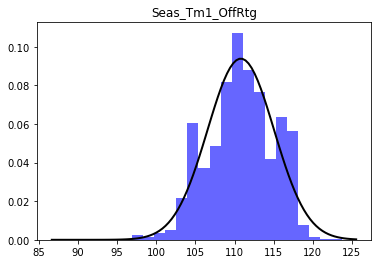

In [18]:
data = df['Seas_Tm1_OffRtg']
mu, std = norm.fit(data) 
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std) 
plt.plot(x, p, 'k', linewidth=2)
title = 'Seas_Tm1_OffRtg'
plt.title(title) 
plt.show()

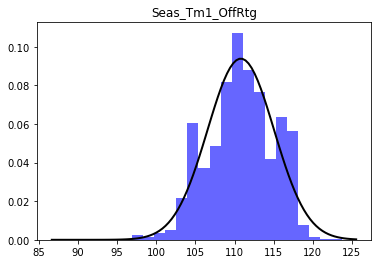

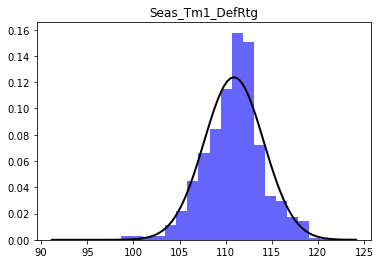

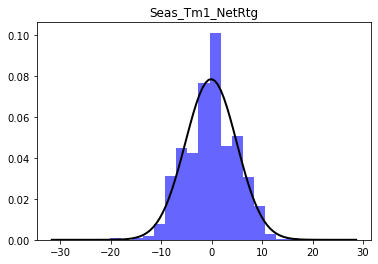

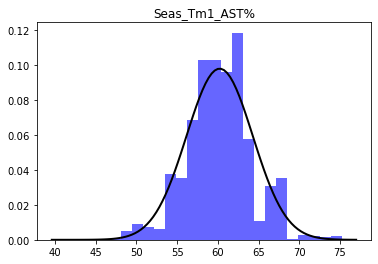

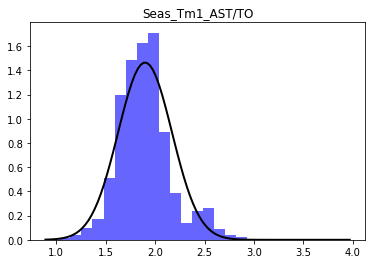

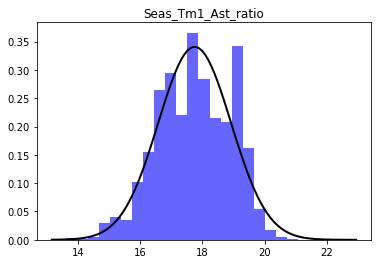

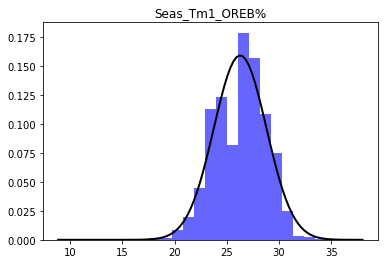

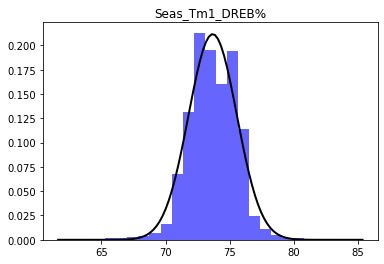

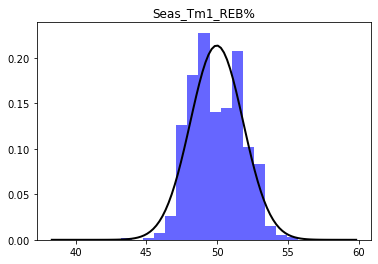

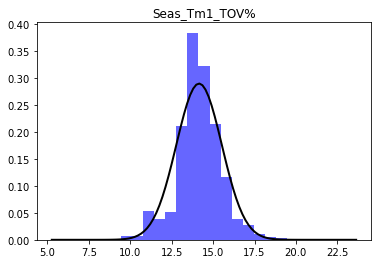

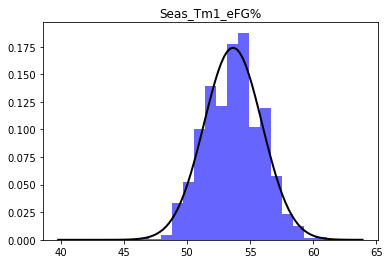

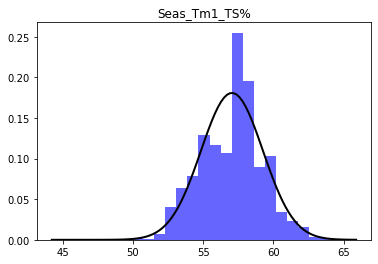

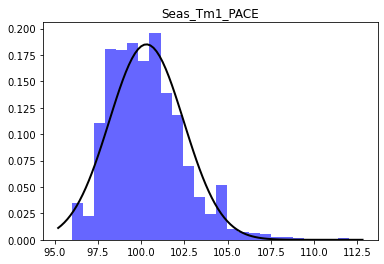

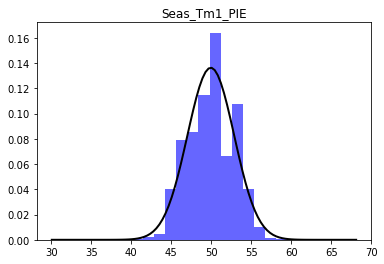

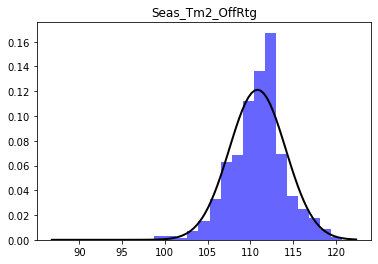

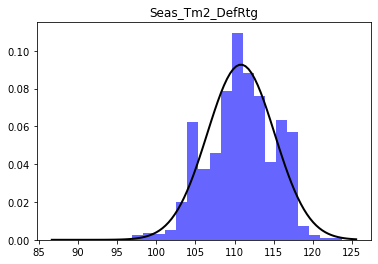

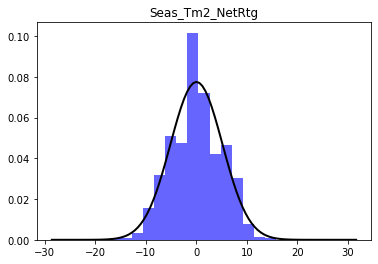

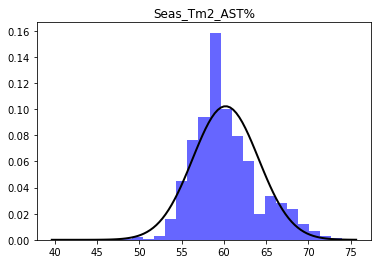

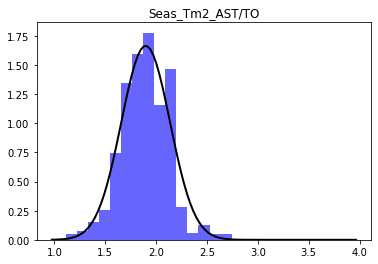

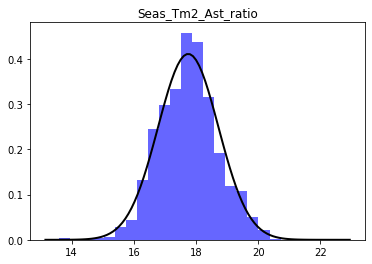

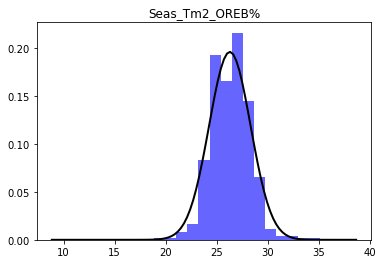

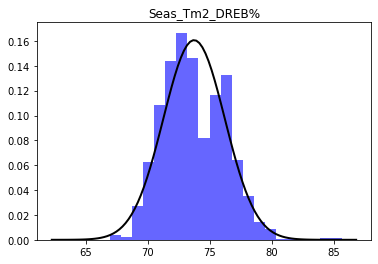

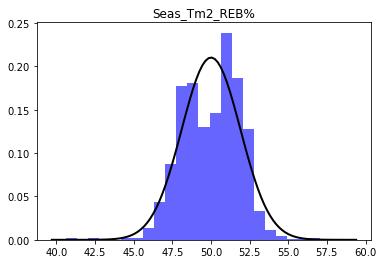

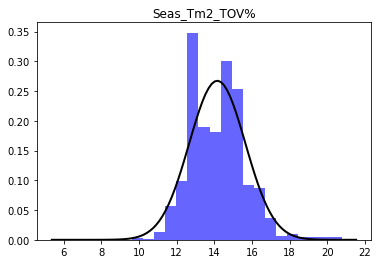

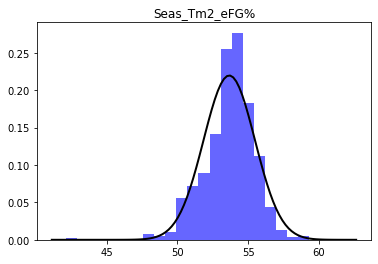

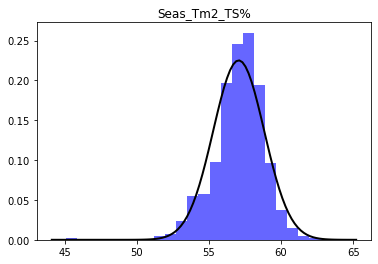

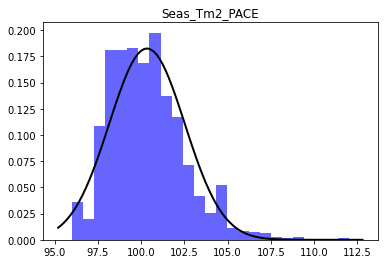

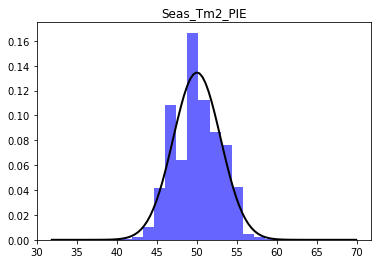

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [19]:
for column in df:
    data = df[column]
    mu, std = norm.fit(data) 
    # Plot the histogram.
    plt.hist(df[column], bins=25, density=True, alpha=0.6, color='b')
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std) 
    plt.plot(x, p, 'k', linewidth=2)
    title = str(column)
    plt.title(title) 
    plt.show()

Great. `'Age'` is numeric, as it should be. Now we're ready to create some dummy columns and deal with our categorical variables.  

In the cell below, use Pandas to create dummy columns for each of categorical variables. If you're unsure of how to do this, check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).  

In [20]:
# Create dummy variables
data = pd.get_dummies(nba)
data.head()

,Seas_Tm1_OffRtg,Seas_Tm1_DefRtg,Seas_Tm1_NetRtg,Seas_Tm1_AST%,Seas_Tm1_AST/TO,Seas_Tm1_Ast_ratio,Seas_Tm1_OREB%,Seas_Tm1_DREB%,Seas_Tm1_REB%,Seas_Tm1_TOV%,...,Seas_Tm2_PIE,OPENING TOTAL,CLOSING TOTAL,TEAM\nREST DAYS_1,TEAM\nREST DAYS_2,TEAM\nREST DAYS_3+,TEAM\nREST DAYS_3IN4,TEAM\nREST DAYS_3IN4-B2B,TEAM\nREST DAYS_4IN5-B2B,TEAM\nREST DAYS_B2B
0,110.46,111.93,-1.47,58.51,2.36,17.80,24.29,73.61,48.58,11.38,...,46.62,225.5,221.5,0,0,0,0,0,1,0
1,112.84,116.56,-3.71,59.84,2.09,18.38,25.05,71.29,48.03,13.27,...,45.65,227.0,222.0,0,0,0,1,0,0,0
2,110.06,112.09,-2.02,67.56,1.99,19.18,27.41,72.49,49.55,14.91,...,50.37,229.5,228.0,0,0,0,0,1,0,0
3,110.47,111.58,-1.12,63.60,1.91,19.19,26.32,76.94,51.86,15.00,...,46.56,224.5,224.5,0,0,0,0,1,0,0
4,111.86,111.76,0.11,63.50,2.18,19.18,24.52,70.52,47.58,13.14,...,51.45,229.5,227.0,0,0,0,0,1,0,0


Now, split `data` and `target` into 75/25 training and test sets. Set the `random_state` to 123.  

In [21]:
data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                    test_size = 0.25, random_state=120)

## Build a "regular" tree as a baseline

We'll begin by fitting a regular decision tree classifier, so that we have something to compare our ensemble methods to.  

### Build the tree

In the cell below, instantiate and fit a decision tree classifier. Set the `criterion` to `'gini'`, and a `max_depth` of `5`.  Then, fit the tree to the training data and labels.   

In [22]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(max_depth=5)

### Feature importance

Let's quickly examine how important each feature ended up being in our decision tree model. Check the `feature_importances_` attribute of the trained model to see what it displays. 

In [23]:
# Feature importance
tree_clf.feature_importances_

array([0.        , 0.04915088, 0.31609912, 0.        , 0.03205993,
       0.0331632 , 0.        , 0.02240789, 0.        , 0.01262999,
       0.        , 0.01892443, 0.0081806 , 0.10953278, 0.0127081 ,
       0.        , 0.09009698, 0.        , 0.01925471, 0.01895354,
       0.        , 0.        , 0.        , 0.        , 0.00936892,
       0.        , 0.        , 0.16429012, 0.0663624 , 0.01681643,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

That matrix isn't very helpful, but a visualization of the data it contains could be.  Run the cell below to plot a visualization of the feature importances for this model. 

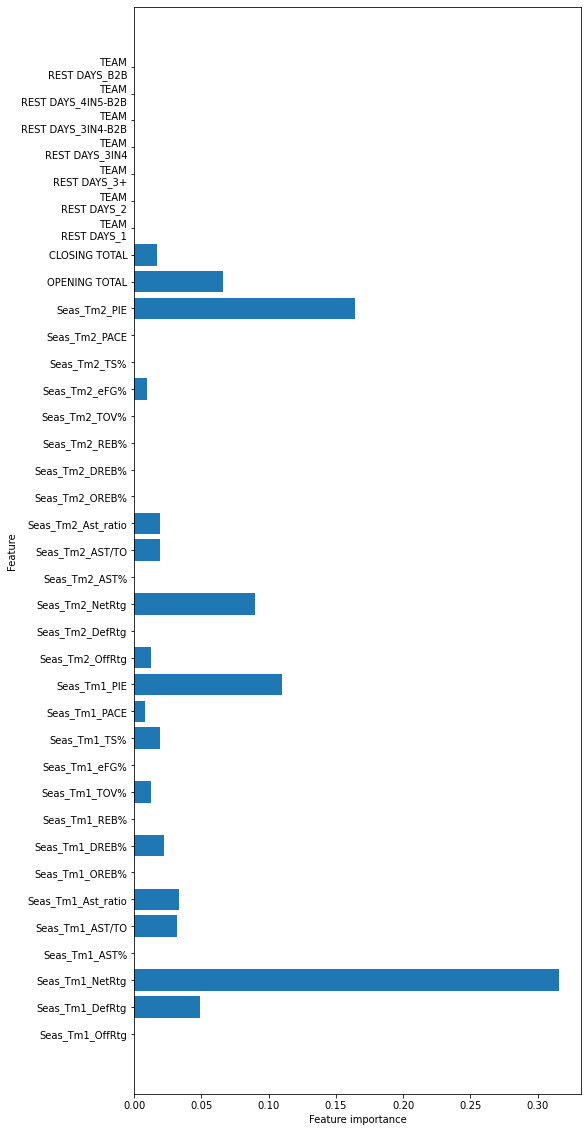

In [24]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8, 20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

### Model performance

Next, let's see how well our model performed on the test data. 

In the cell below:

* Use the model to generate predictions on the test set  
* Print out a `confusion_matrix` of the test set predictions 
* Print out a `classification_report` of the test set predictions 

In [25]:
# Test set predictions
pred = tree_clf.predict(data_test)

# Confusion matrix and classification report
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

[[182  85]
 [107 160]]
              precision    recall  f1-score   support

           L       0.63      0.68      0.65       267
           W       0.65      0.60      0.62       267

    accuracy                           0.64       534
   macro avg       0.64      0.64      0.64       534
weighted avg       0.64      0.64      0.64       534



Now, let's check the model's accuracy. Run the cell below to display the test set accuracy of the model. 

In [26]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(target_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 64.04%


## Bagged trees

The first ensemble approach we'll try is a bag of trees. This will make use of **_Bagging_**, along with a number of decision tree classifier models.  

Now, let's instantiate a [`BaggingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).  First, initialize a `DecisionTreeClassifier` and set the same parameters that we did above for `criterion` and `max_depth`.  Also set the `n_estimators` parameter for our `BaggingClassifier` to `20`. 

In [27]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

Great! Now, fit it to our training data. 

In [28]:
# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                  n_estimators=20)

Checking the accuracy of a model is such a common task that all (supervised learning) models have a `.score()` method that wraps the `accuracy_score()` helper function we've been using. All we have to do is pass it a dataset and the corresponding labels and it will return the accuracy score for those data/labels.  

Let's use it to get the training accuracy of our model. In the cell below, call the `.score()` method on our bagging model and pass in our training data and training labels as parameters. 

In [29]:
# Training accuracy score
bagged_tree.score(data_train, target_train)

0.7632729544034978

Now, let's check the accuracy score that really matters -- our testing accuracy.  This time, pass in our testing data and labels to see how the model did.  

In [30]:
# Test accuracy score
bagged_tree.score(data_test, target_test)

0.704119850187266

## Random forests

Another popular ensemble method is the **_Random Forest_**. Let's fit a random forest classifier next and see how it measures up compared to all the others. 

### Fit a random forests model

In the cell below, instantiate and fit a `RandomForestClassifier`, and set the number estimators to `100` and the max depth to `5`. Then, fit the model to our training data. 

In [31]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(max_depth=5)

Now, let's check the training and testing accuracy of the model using its `.score()` method: 

In [32]:
# Training accuracy score
forest.score(data_train, target_train)

0.7557776389756402

In [33]:
# Test accuracy score
forest.score(data_test, target_test)

0.7097378277153558

### Feature importance

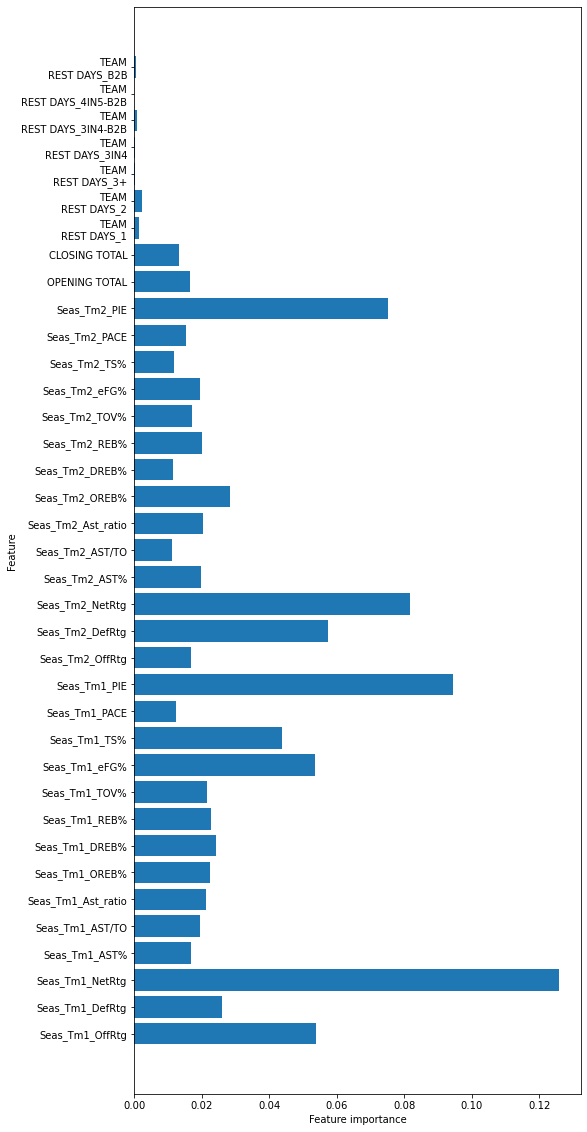

In [34]:
plot_feature_importances(forest)

Note: "relationship" represents what this individual is relative to others. For example an
individual could be a Husband. Each entry only has one relationship, so it is a bit of a weird attribute.

Also note that more features show up. This is a pretty typical result. 

### Look at the trees in your forest

Let's create a forest with some small trees. You'll learn how to access trees in your forest!

In the cell below, create another `RandomForestClassifier`.  Set the number of estimators to 5, the `max_features` to 10, and the `max_depth` to 2.

In [35]:
# Instantiate and fit a RandomForestClassifier
forest_2 = RandomForestClassifier(n_estimators = 5, max_features= 5, max_depth= 2)
forest_2.fit(data_train, target_train)

RandomForestClassifier(max_depth=2, max_features=5, n_estimators=5)

Making `max_features` smaller will lead to very different trees in your forest! The trees in your forest are stored in the `.estimators_` attribute.

In the cell below, get the first tree from `forest_2.estimators_` and store it in `rf_tree_1`

In [36]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

Now, we can reuse our `plot_feature_importances()` function to visualize which features this tree was given to use duing subspace sampling. 

In the cell below, call `plot_feature_importances()` on `rf_tree_1`.

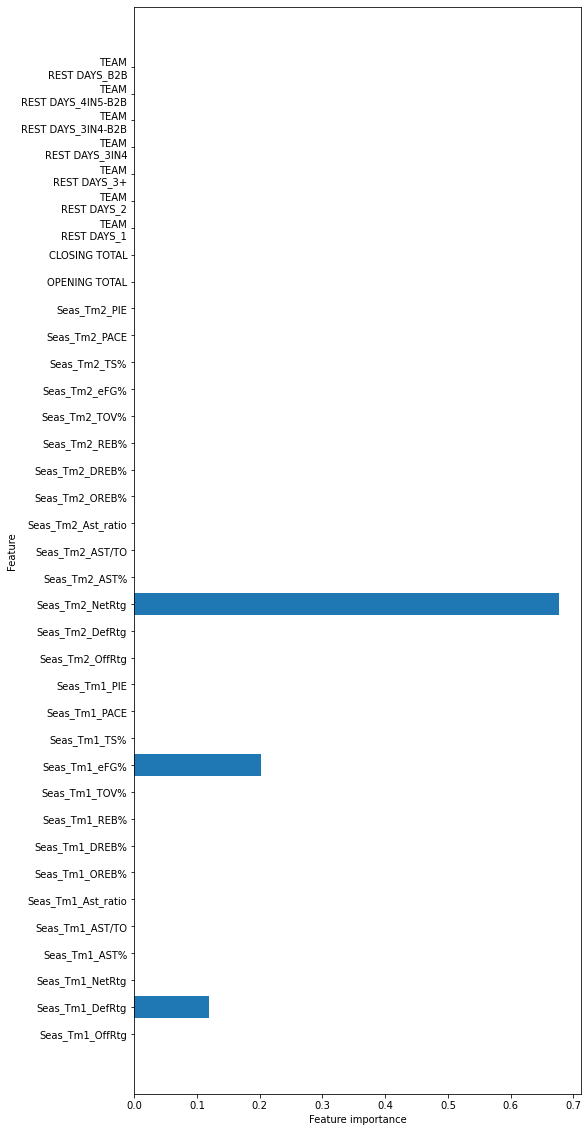

In [37]:
# Feature importance
plot_feature_importances(rf_tree_1)

Now, grab the second tree and store it in `rf_tree_2`, and then pass it to `plot_feature_importances()` in the following cell so we can compare which features were most useful to each. 

In [38]:
# Second tree from forest_2
rf_tree_2 = forest_2.estimators_[1]

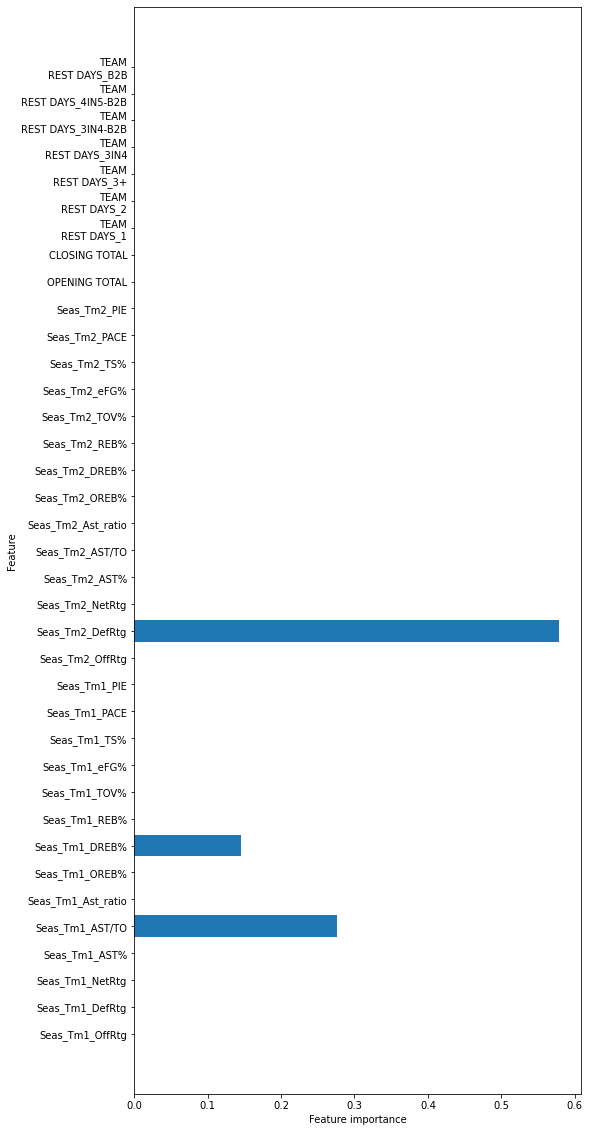

In [39]:
# Feature importance
plot_feature_importances(rf_tree_2)

We can see by comparing the two plots that the two trees we examined from our random forest look at different attributes, and have wildly different feature importances!

## Summary

In this lab, we got some practice creating a few different tree ensemble methods. We also learned how to visualize feature importances, and compared individual trees from a random forest to see if we could notice the differences in the features they were trained on. 

## Adding Features

Things I want to add:

- Injuries
- Missing USG (from Injury)
- Need Wins? Fighting for homecourt or playoffs, need to work through this logic. 
- Over/Under odds
- Actual Over/Under? (this info is in BigDataBall)

